In [37]:
from string import punctuation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tenacity import stop_when_event_set

from ML_RandomForest import X_train, X_test

In [38]:
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hema\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
import tensorflow as tf

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings("ignore")

Creating dataframe from Email.csv

In [42]:
data = pd.read_csv('P:\AI_Learn\Hello\email.csv')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [43]:
data.shape

(5171, 4)

The csv file has 5171 rows and 4 columns

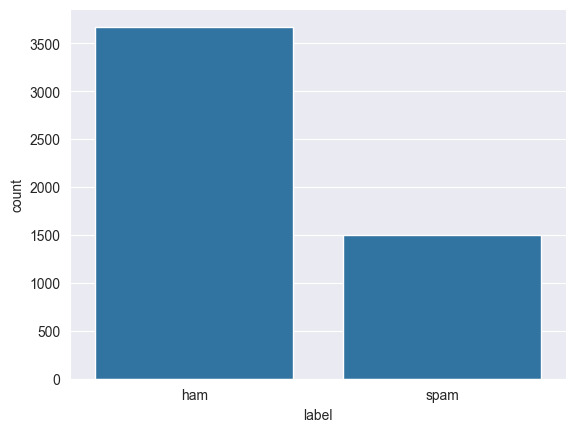

In [44]:
sns.countplot(x='label', data=data)
plt.show()

The number of Ham emails are much more than spam. We need to balance the dataset.

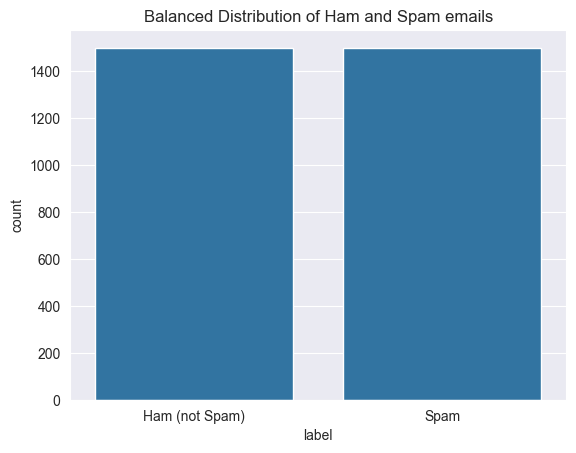

In [45]:
ham_msg=data[data['label']=='ham']
spam_msg=data[data['label']=='spam']
ham_msg_balanced=ham_msg.sample(n=len(spam_msg), random_state=42)
#Combine balanced data
balanced_data=pd.concat([ham_msg_balanced, spam_msg]).reset_index(drop=True)

#Visualize the balance dataset
sns.countplot(x='label', data=balanced_data)
plt.title('Balanced Distribution of Ham and Spam emails')
plt.xticks(ticks=[0,1], labels=['Ham (not Spam)','Spam'])
plt.show()

Clean the Text
Removing stopwords, punctuations, and performing stemming/lemmatization

In [46]:
#Stopwords removal
balanced_data['text']=balanced_data['text'].str.replace('Subject  ','')
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,Subject: conoco - big cowboy\r\ndarren :\r\ni ...,0
1,2982,ham,Subject: feb 01 prod : sale to teco gas proces...,0
2,2711,ham,Subject: california energy crisis\r\ncaliforni...,0
3,3116,ham,Subject: re : nom / actual volume for april 23...,0
4,1314,ham,Subject: eastrans nomination changes effective...,0


Remove punctuations from "text" column

In [47]:
p=string.punctuation

def remove_punctuation(text):
    t=str.maketrans('','',p)
    tt=text.translate(t)
    return tt
balanced_data['text']=balanced_data['text'].apply(remove_punctuation)
balanced_data.head()


,Unnamed: 0,label,text,label_num
0,3444,ham,Subject conoco big cowboy\r\ndarren \r\ni m ...,0
1,2982,ham,Subject feb 01 prod sale to teco gas processi...,0
2,2711,ham,Subject california energy crisis\r\ncalifornia...,0
3,3116,ham,Subject re nom actual volume for april 23 rd...,0
4,1314,ham,Subject eastrans nomination changes effective ...,0


Remove word "Subject" from "text" column

In [48]:
balanced_data['text']=balanced_data['text'].str.replace('Subject','')
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy\r\ndarren \r\ni m not sur...,0
1,2982,ham,feb 01 prod sale to teco gas processing\r\ns...,0
2,2711,ham,california energy crisis\r\ncalifornia  s p...,0
3,3116,ham,re nom actual volume for april 23 rd\r\nwe ...,0
4,1314,ham,eastrans nomination changes effective 8 2 0...,0


Removed Stopwords from "text" column

In [49]:
stop_words = stopwords.words('english')

def remove_stop_words(text):
   for x in str(text).split():
       if x in stop_words:
           text = text.replace(x,'')
       return text

balanced_data['text']=balanced_data['text'].apply(remove_stop_words)
balanced_data.head()


,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy\r\ndarren \r\ni m not sur...,0
1,2982,ham,feb 01 prod sale to teco gas processing\r\ns...,0
2,2711,ham,california energy crisis\r\ncalifornia  s p...,0
3,3116,ham,nom actual volume for april 23 rd\r\nwe ag...,0
4,1314,ham,eastrans nomination changes effective 8 2 0...,0


In [50]:
def replace_None(text):
    if text==None:
        text='Blank Email'
        return text
    else:
        return text

balanced_data['text']=balanced_data['text'].apply(replace_None)
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy\r\ndarren \r\ni m not sur...,0
1,2982,ham,feb 01 prod sale to teco gas processing\r\ns...,0
2,2711,ham,california energy crisis\r\ncalifornia  s p...,0
3,3116,ham,nom actual volume for april 23 rd\r\nwe ag...,0
4,1314,ham,eastrans nomination changes effective 8 2 0...,0


Word Cloud Visualization

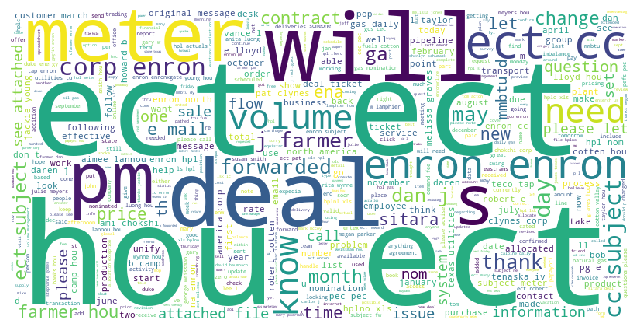

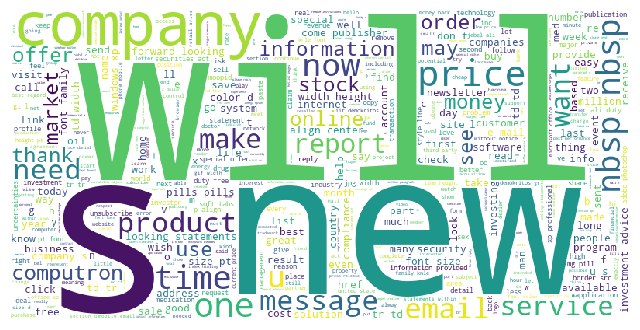

In [51]:
def plot_word_cloud(data,typ):
    email_corpus = " ".join(data['text'])
    wc=WordCloud(width=800, height=400, background_color='white', max_words=2000).generate(email_corpus)
    plt.figure(figsize=[8,6])
    plt.imshow(wc, interpolation='nearest')
    plt.axis("off")
    plt.show()

plot_word_cloud(balanced_data[balanced_data['label']=='ham'],typ="Non-Spam")
ot_word_cloud(balanced_data[balanced_data['label']=='spam'],typ="Spam")

Converting text data to numerical data using Tokenization and Padding

Tokenization: Converts each word into a unique integer

Padding: Ensures all text sequences are of same length, making them compatible with the model

In [58]:
X_train,X_test, Y_train,Y_test=train_test_split(balanced_data['text'], balanced_data['label'], test_size=0.2, random_state=42)
t=Tokenizer()
t.fit_on_texts(X_train)
train_sequences=t.texts_to_sequences(X_train)
test_sequences=t.texts_to_sequences(X_test)
train_sequences=pad_sequences(train_sequences,maxlen=100,padding='post',truncating='post',value=0)
test_sequences=pad_sequences(test_sequences,maxlen=100,padding='post',truncating='post',value=0)

Y_train=(Y_train=='spam').astype(int)
Y_test=(Y_test=='spam').astype(int)



,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy\r\ndarren \r\ni m not sur...,0
1,2982,ham,feb 01 prod sale to teco gas processing\r\ns...,0
2,2711,ham,california energy crisis\r\ncalifornia  s p...,0
3,3116,ham,nom actual volume for april 23 rd\r\nwe ag...,0
4,1314,ham,eastrans nomination changes effective 8 2 0...,0
